In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import quandl
from sklearn import preprocessing
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

## Enter desired start and end dates

In [2]:
start = dt.datetime(2017, 3, 31)
end = dt.datetime.now()
num_months = (end.year - start.year) * 12 + (end.month - start.month)
print('Number of months in range:', num_months)

Number of months in range: 37


### PMI

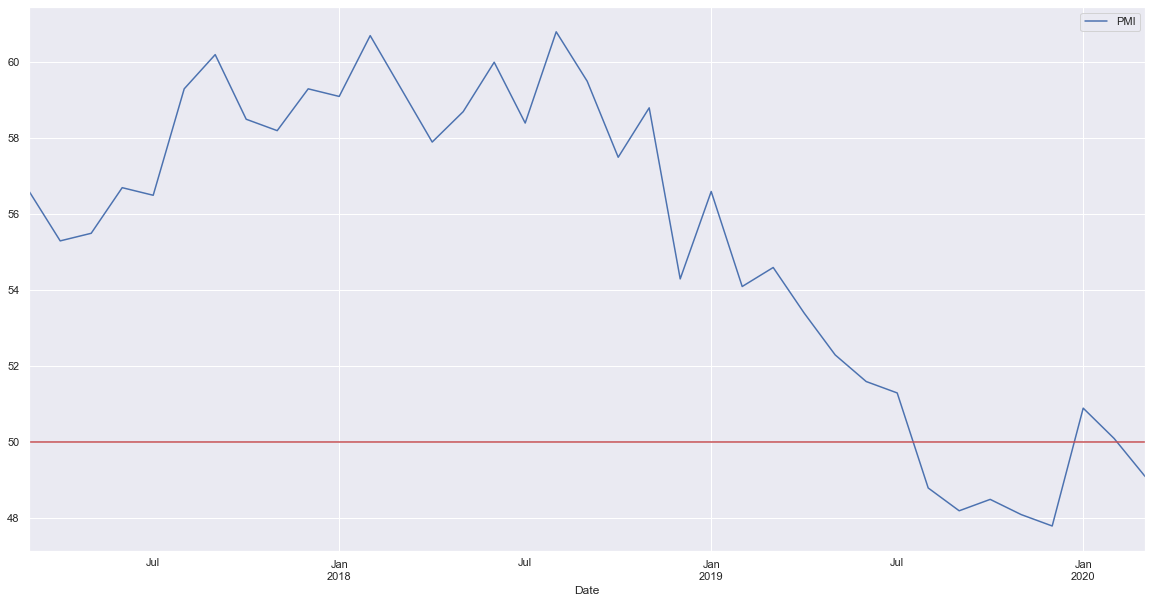

In [3]:
df_PMI = quandl.get("ISM/MAN_PMI", authtoken="EnterYourTokenHere")
df_PMI.rename(columns={'VALUE': "PMI"}, inplace=True)
df_PMI = df_PMI[-num_months:]
df_PMI.plot(figsize=(20, 10))
plt.axhline(50, color="r");

## NMI

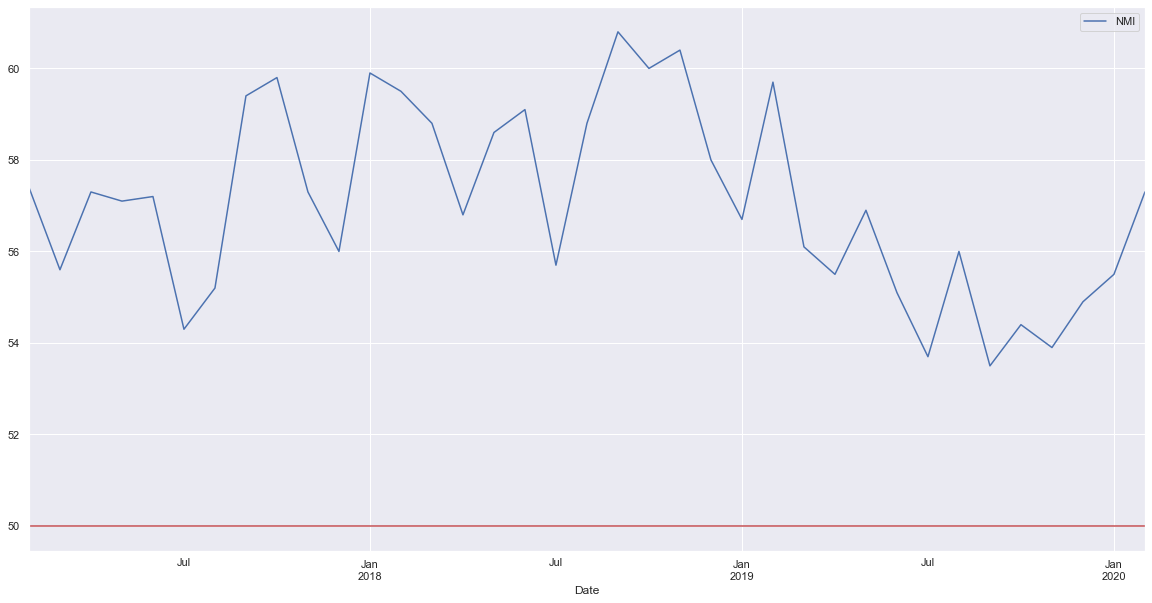

In [4]:
df_PMI = quandl.get("ISM/NONMAN_NMI", authtoken="EnterYourTokenHere")
df_PMI.rename(columns={'Index': "NMI"}, inplace=True)
df_PMI = df_PMI[-num_months:]
df_PMI.plot(figsize=(20, 10))
plt.axhline(50, color="r");

### UMCSI

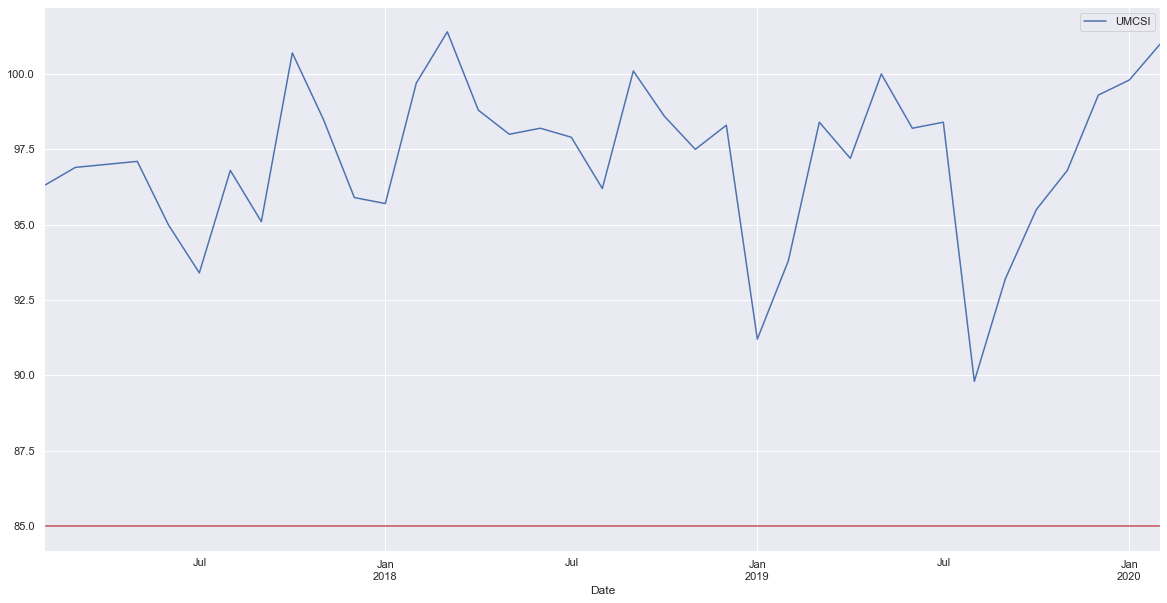

In [5]:
df_UMCSI = quandl.get("UMICH/SOC1", authtoken="EnterYourTokenHere")
df_UMCSI = df_UMCSI[::-1]
df_UMCSI.rename(columns={'Index': "UMCSI"}, inplace=True)
df_UMCSI = df_UMCSI[:num_months]
df_UMCSI.plot(figsize=(20, 10))
plt.axhline(85, color="r");

## Housing Starts

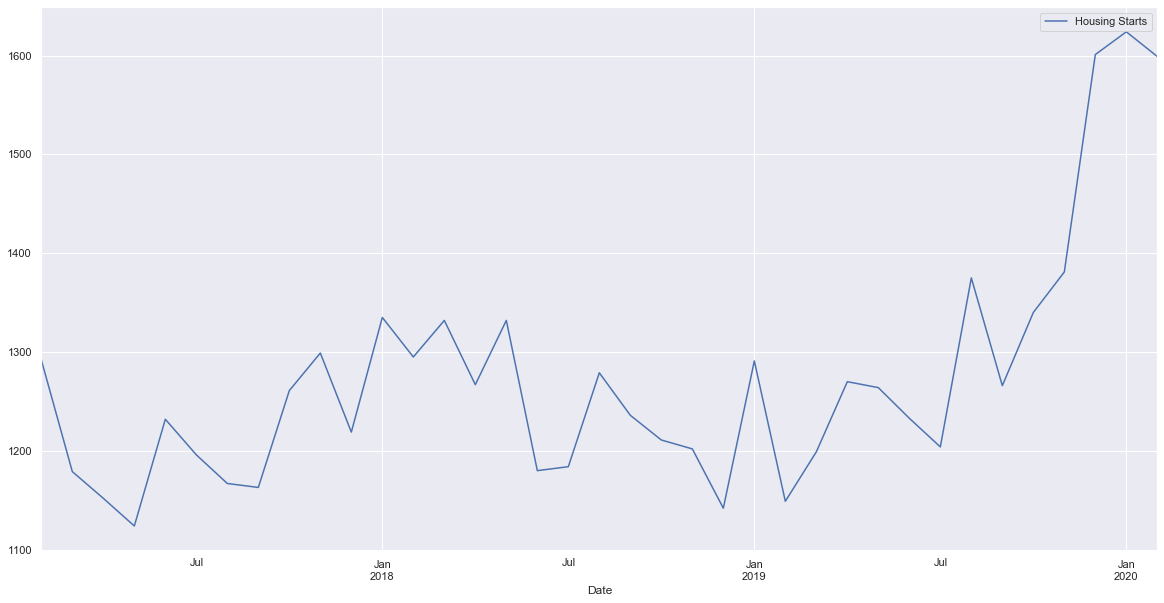

In [6]:
df_house_starts = quandl.get("FRED/HOUST", authtoken="EnterYourTokenHere")
df_house_starts = df_house_starts[::-1]
df_house_starts.rename(columns={'Value': "Housing Starts"}, inplace=True)
df_house_starts = df_house_starts[:num_months]
df_house_starts.plot(figsize=(20, 10));

## Money Supply (M2)

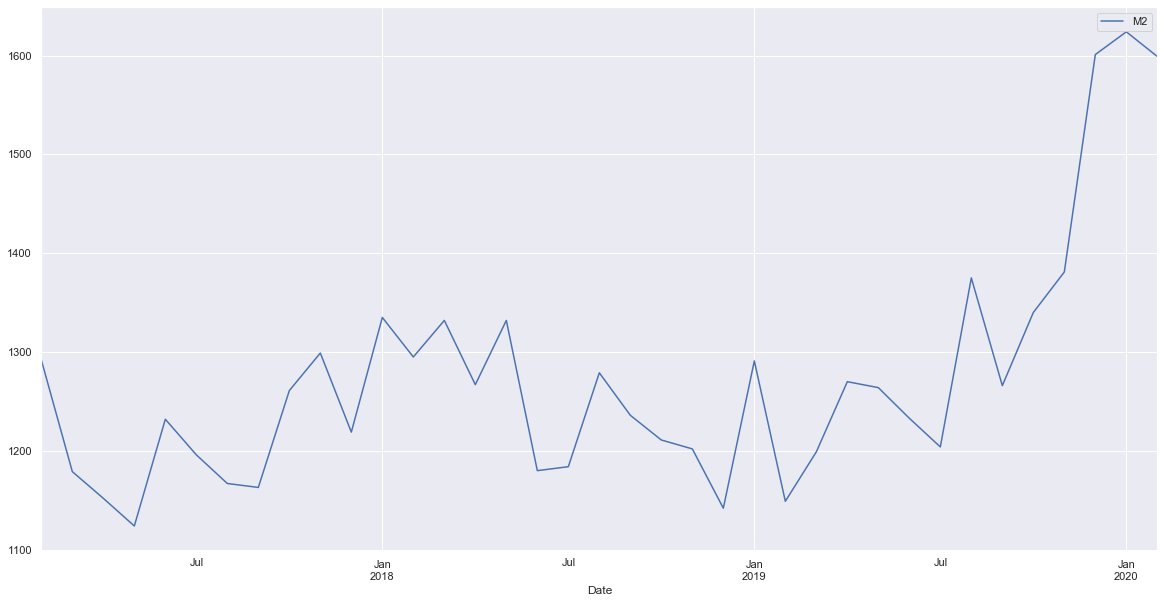

In [7]:
df_m2 = quandl.get("FRED/HOUST", authtoken="EnterYourTokenHere")
df_m2 = df_m2[::-1]
df_m2.rename(columns={'Value': "M2"}, inplace=True)
df_m2 = df_m2[:num_months]
df_m2.plot(figsize=(20, 10));

## Unemployment Rate

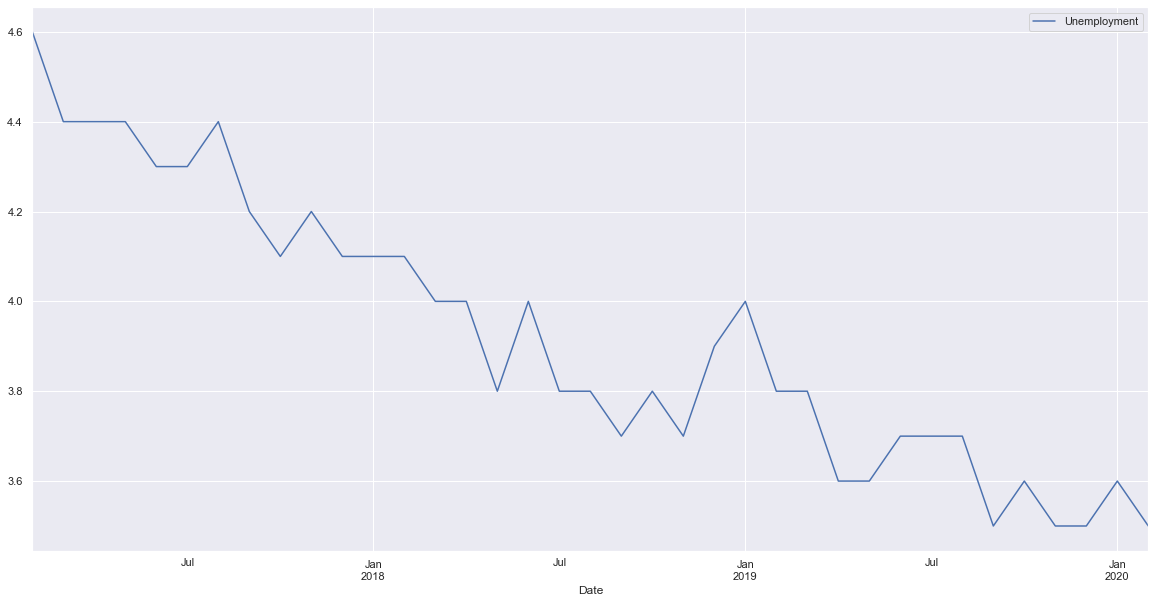

In [8]:
df_unemployment = quandl.get("FRED/UNRATE", authtoken="EnterYourTokenHere")
df_unemployment = df_unemployment[::-1]
df_unemployment.rename(columns={'Value': "Unemployment"}, inplace=True)
df_unemployment = df_unemployment[:num_months]
df_unemployment.plot(figsize=(20, 10));

## Consumer Price Index

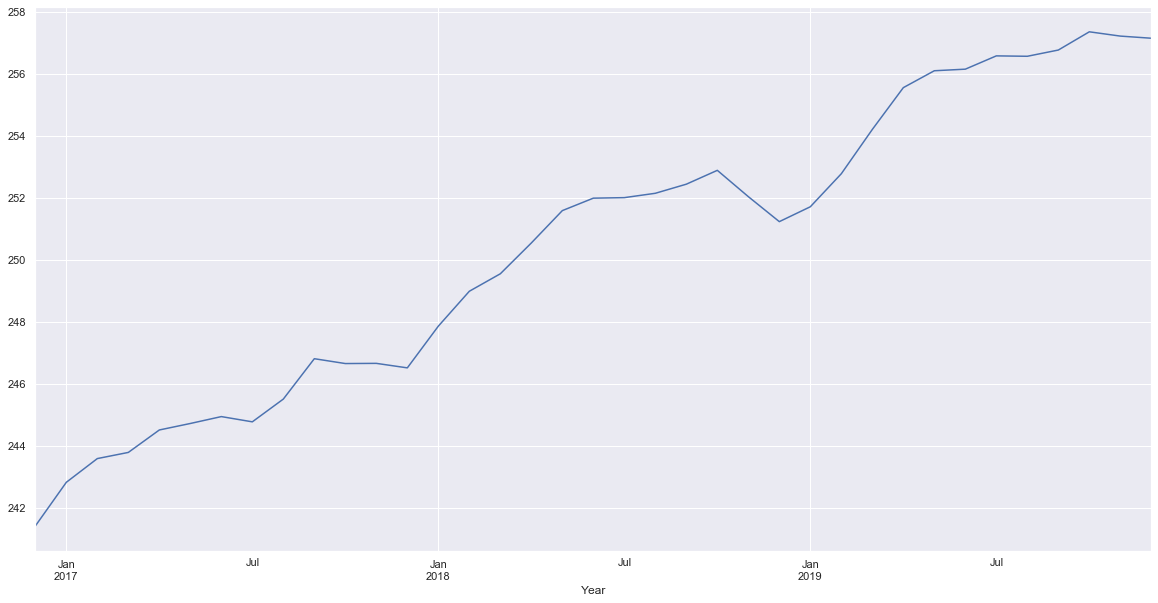

In [9]:
df_market = quandl.get("YALE/SPCOMP", authtoken="EnterYourTokenHere")
df_market = df_market[::-1]
df_market = df_market[:num_months]
df_market.drop(['S&P Composite', 'Dividend', 'Earnings', 'Long Interest Rate', 'Real Price', 'Real Dividend', 'Real Earnings'], 1, inplace=True)
df_market.rename(columns={'Cyclically Adjusted PE Ratio': "PE"}, inplace=True)
df_market['CPI'].plot(figsize=(20, 10));

## Market PE

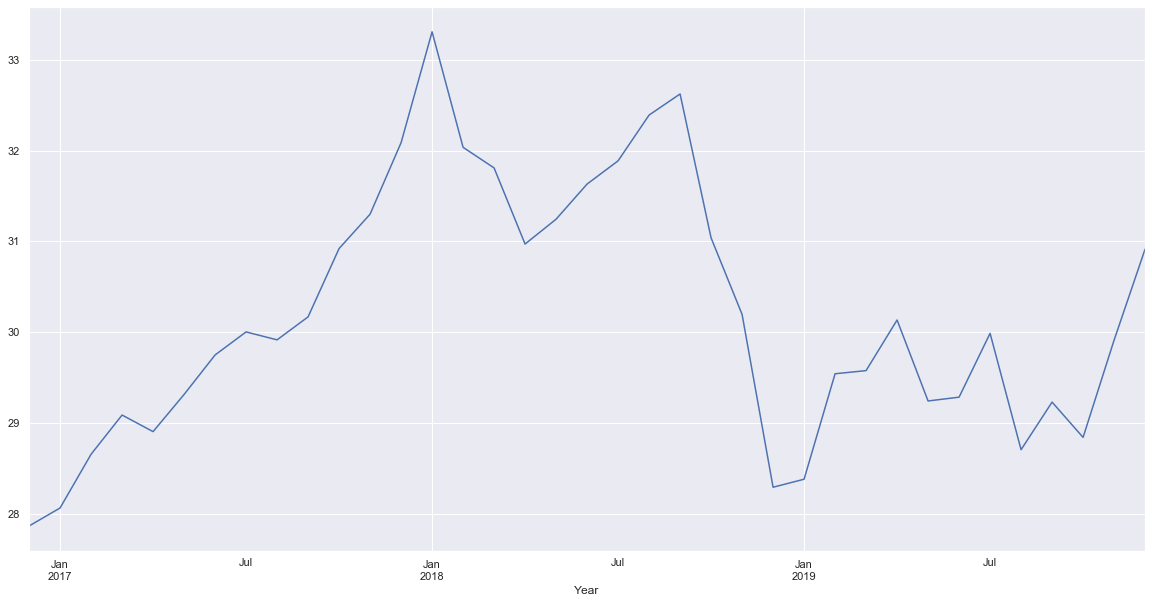

In [10]:
df_market['PE'].plot(figsize=(20, 10));

## S&P500 

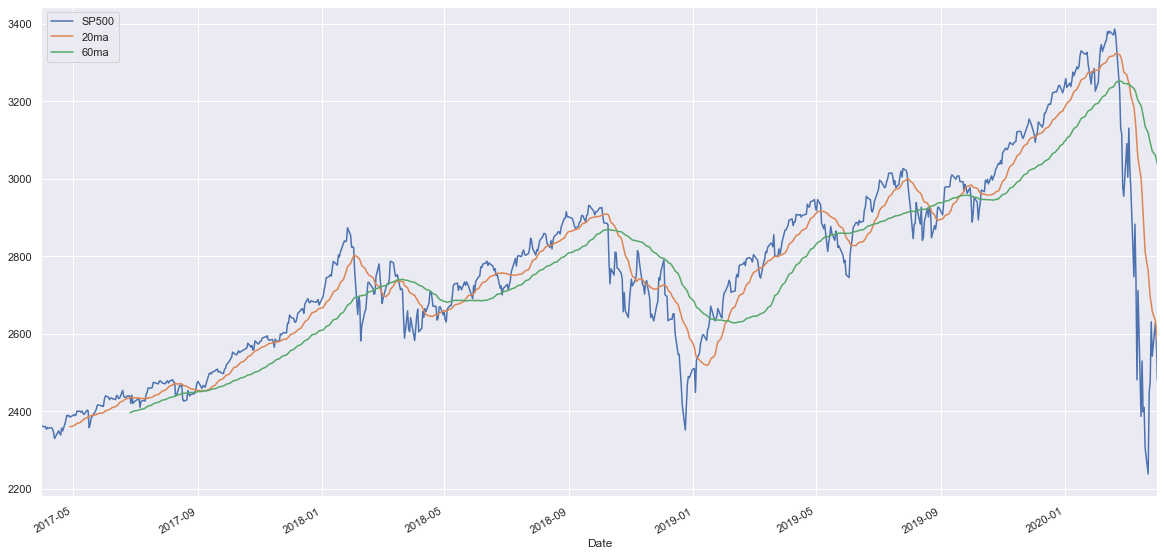

In [11]:
df_SP500 = web.DataReader("^GSPC", 'yahoo', start, end)
df_SP500.rename(columns={'Adj Close': "SP500"}, inplace=True)
df_SP500.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

df_SP500['20ma'] = df_SP500['SP500'].rolling(window=20).mean()
df_SP500['60ma'] = df_SP500['SP500'].rolling(window=60).mean()

df_SP500.plot(figsize=(20, 10));

## VIX

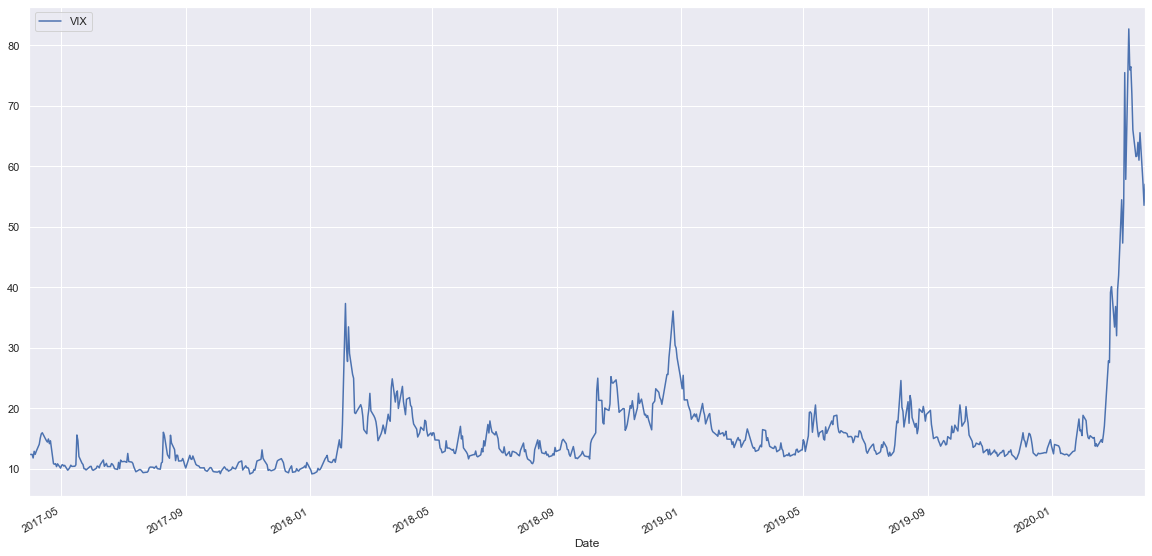

In [12]:
df_VIX = web.DataReader("^VIX", 'yahoo', start, end)
df_VIX = df_VIX[::-1]
df = web.DataReader("^VIX", 'yahoo', start, end)
df.rename(columns={'Adj Close': "VIX"}, inplace=True)
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
df = df[::-1]
df.plot(figsize=(20, 10));

## Yield Curve (10-year minus 2-year)

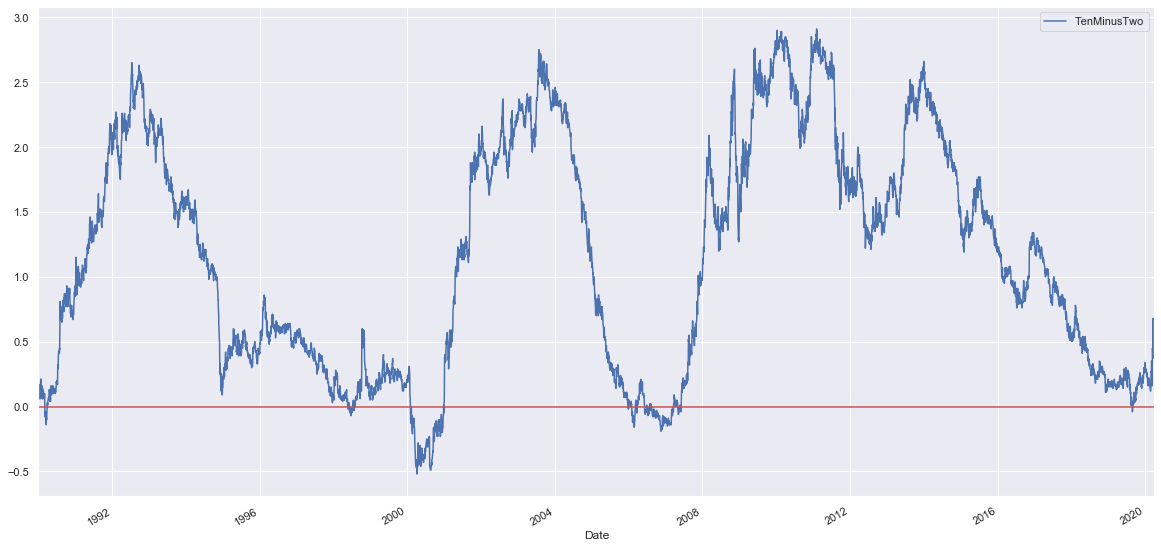

In [13]:
df_treasuryRates = quandl.get("USTREASURY/YIELD", authtoken="EnterYourTokenHere")
df_treasuryRates = df_treasuryRates[::-1]
df_treasuryRates['TenMinusTwo'] = df_treasuryRates['10 YR'] - df_treasuryRates['2 YR']
df_treasuryRates.drop(['1 MO', '2 MO', '3 MO', '6 MO', '1 YR', '2 YR', '3 YR', '5 YR', '7 YR', '10 YR', '20 YR', '30 YR'], 1, inplace=True)
df_treasuryRates.plot(figsize=(20, 10))
plt.axhline(0, color="r");